In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df=pd.read_csv('data_2.csv.zip')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_primary_category                        175777 non-null  int64  
 4   order_protocol                                175777 non-null  float64
 5   total_items                                   175777 non-null  int64  
 6   subtotal                                      175777 non-null  int64  
 7   num_distinct_items                            175777 non-null  int64  
 8   min_item_price                                175777 non-null  int64  
 9   max_item_price                                17

In [ ]:
df.nunique()

market_id                                            6
created_at                                      162649
actual_delivery_time                            160344
store_primary_category                              73
order_protocol                                       7
total_items                                         54
subtotal                                          8182
num_distinct_items                                  20
min_item_price                                    2251
max_item_price                                    2585
total_onshift_dashers                              172
total_busy_dashers                                 158
total_outstanding_orders                           281
estimated_store_to_consumer_driving_duration      1318
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
market_id,175777.0,2.743726,1.330963,1.0,2.0,2.0,4.0,6.0
store_primary_category,175777.0,35.887949,20.728254,0.0,18.0,38.0,55.0,72.0
order_protocol,175777.0,2.911752,1.513128,1.0,1.0,3.0,4.0,7.0
total_items,175777.0,3.204976,2.674055,1.0,2.0,3.0,4.0,411.0
subtotal,175777.0,2697.111147,1828.554893,0.0,1412.0,2224.0,3410.0,26800.0
num_distinct_items,175777.0,2.675060,1.625681,1.0,1.0,2.0,3.0,20.0
min_item_price,175777.0,684.965433,519.882924,-86.0,299.0,595.0,942.0,14700.0
max_item_price,175777.0,1160.158616,560.828571,0.0,799.0,1095.0,1395.0,14700.0
total_onshift_dashers,175777.0,44.918664,34.544724,-4.0,17.0,37.0,66.0,171.0
total_busy_dashers,175777.0,41.861381,32.168505,-5.0,15.0,35.0,63.0,154.0


In [ ]:
df['created_at']=df['created_at'].astype('datetime64')
df['actual_delivery_time']=df['actual_delivery_time'].astype('datetime64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     175777 non-null  float64       
 1   created_at                                    175777 non-null  datetime64[ns]
 2   actual_delivery_time                          175777 non-null  datetime64[ns]
 3   store_primary_category                        175777 non-null  int64         
 4   order_protocol                                175777 non-null  float64       
 5   total_items                                   175777 non-null  int64         
 6   subtotal                                      175777 non-null  int64         
 7   num_distinct_items                            175777 non-null  int64         
 8   min_item_price                                175777 n

In [ ]:
df['created_at'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  175777
unique                 162649
top       2015-02-11 19:50:43
freq                        6
first     2015-01-21 15:22:03
last      2015-02-18 06:00:44
Name: created_at, dtype: object

In [ ]:
#calculating delivery time in seconds
dlv_time=df['actual_delivery_time']-df['created_at']
df['delivery_time'] = pd.to_timedelta(dlv_time)/pd.Timedelta('60s')
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_time
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,47.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,44.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,55.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,59.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,46.0


In [ ]:
df['delivery_time'].mean()
#average delivery time taken to deliver

46.203012908400986

In [ ]:
df.isnull().sum()

market_id                                       0
created_at                                      0
actual_delivery_time                            0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_store_to_consumer_driving_duration    0
delivery_time                                   0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2d01a1290>,
      dtype=object)

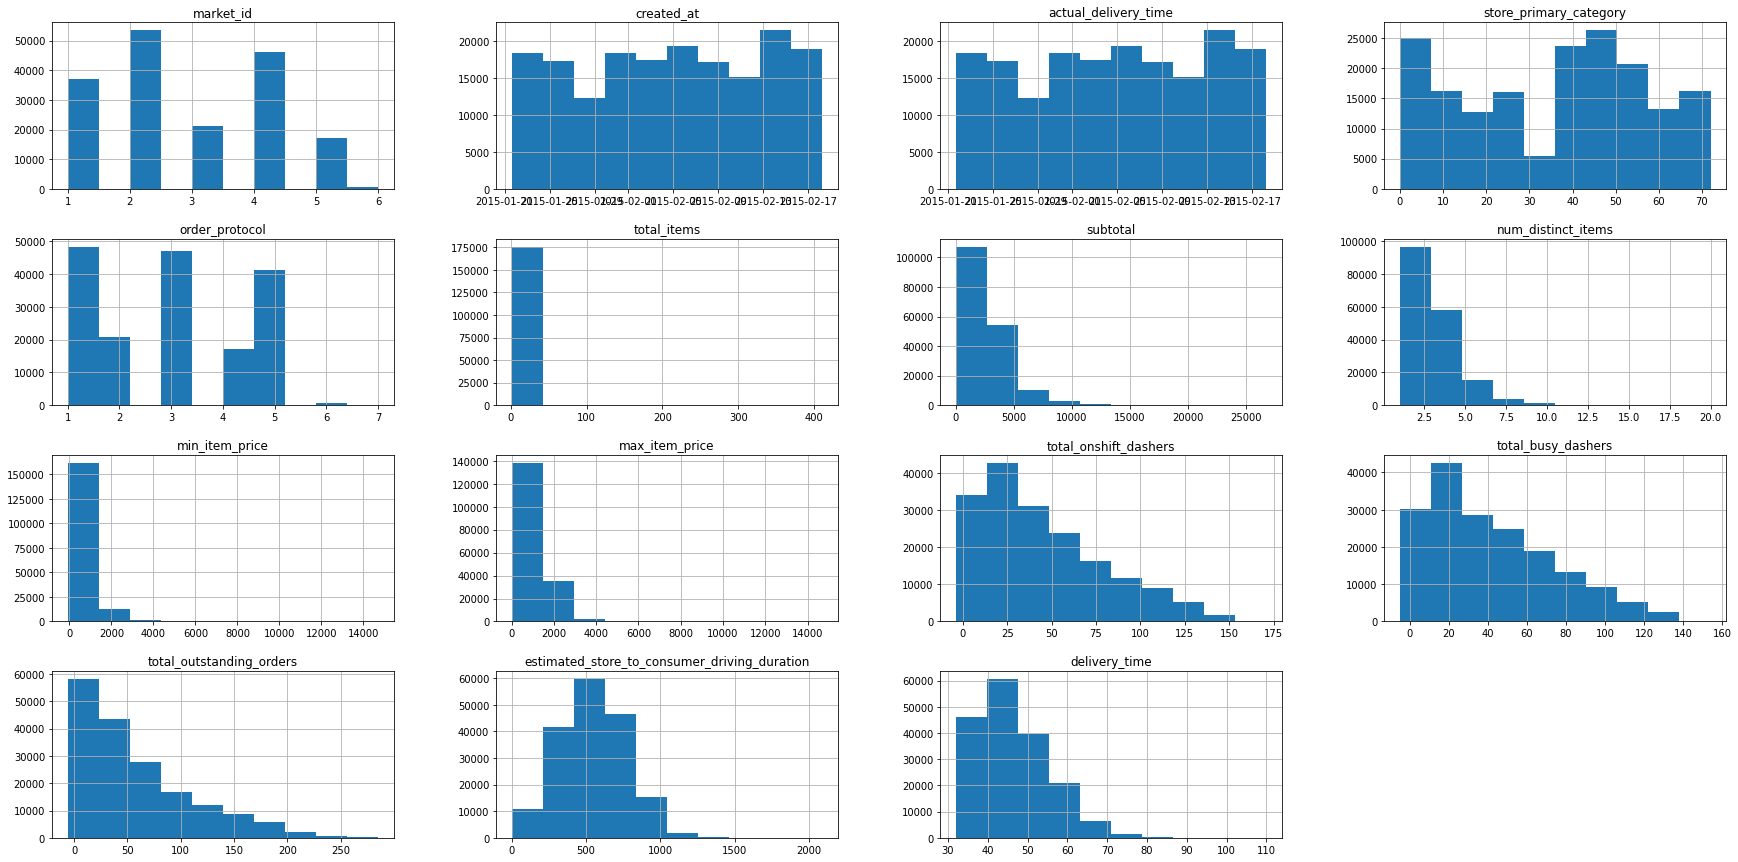

In [ ]:
df.hist(figsize=(30,15))

In [ ]:
df['hour']=df['created_at'].dt.hour
df['day']=df['created_at'].dt.dayofweek

df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_time,hour,day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,47.0,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,44.0,21,1
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,55.0,0,0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,59.0,3,3
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,46.0,2,1


In [ ]:
df.drop(['created_at','actual_delivery_time'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   store_primary_category                        175777 non-null  int64  
 2   order_protocol                                175777 non-null  float64
 3   total_items                                   175777 non-null  int64  
 4   subtotal                                      175777 non-null  int64  
 5   num_distinct_items                            175777 non-null  int64  
 6   min_item_price                                175777 non-null  int64  
 7   max_item_price                                175777 non-null  int64  
 8   total_onshift_dashers                         175777 non-null  float64
 9   total_busy_dashers                            17

In [ ]:
df.isna().sum()

market_id                                       0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift_dashers                           0
total_busy_dashers                              0
total_outstanding_orders                        0
estimated_store_to_consumer_driving_duration    0
delivery_time                                   0
hour                                            0
day                                             0
dtype: int64

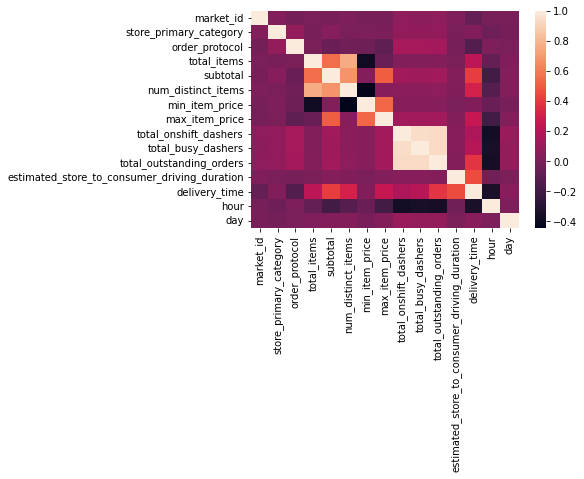

In [ ]:
sns.heatmap(df.corr())

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
model1 = LocalOutlierFactor()

df['lof_anomaly_score'] = model1.fit_predict(df)

In [ ]:
print("number of outliers : ", (len(df.loc[(df['lof_anomaly_score'] == -1)])))
df=df.loc[(df['lof_anomaly_score'] == 1)]

number of outliers :  831


In [ ]:
df.drop(['lof_anomaly_score'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174946 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     174946 non-null  float64
 1   store_primary_category                        174946 non-null  int64  
 2   order_protocol                                174946 non-null  float64
 3   total_items                                   174946 non-null  int64  
 4   subtotal                                      174946 non-null  int64  
 5   num_distinct_items                            174946 non-null  int64  
 6   min_item_price                                174946 non-null  int64  
 7   max_item_price                                174946 non-null  int64  
 8   total_onshift_dashers                         174946 non-null  float64
 9   total_busy_dashers                            17

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


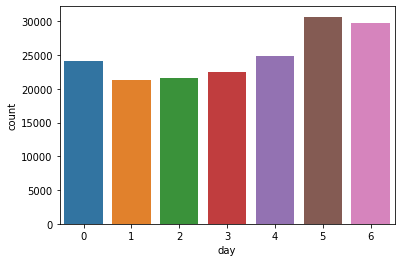

In [ ]:
sns.countplot(df.day)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


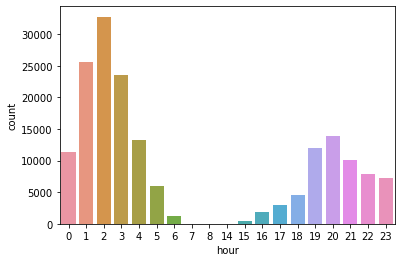

In [ ]:
sns.countplot(df.hour)

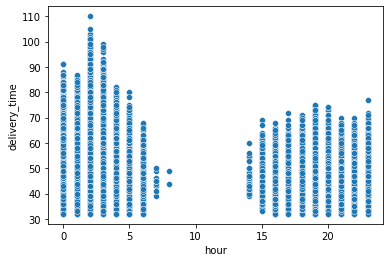

In [ ]:
sns.scatterplot(x='hour',y='delivery_time', data=df)

In [ ]:
scaler = StandardScaler()
df1= pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
#df2=pd.DataFrame(df1,columns=df.columns)

In [ ]:
df1.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_time,hour,day
0,-1.310345,-1.538797,-1.264104,0.318929,0.408109,0.813233,-0.244144,0.146039,-0.345215,-0.866489,-0.706571,1.446184,0.086524,1.559305,0.380407
1,-0.558978,0.487941,-0.603267,-0.888178,-0.438482,-1.033878,1.399361,0.436379,-1.271841,-1.239700,-1.067212,0.661692,-0.235679,1.444044,-1.087601
2,-0.558978,0.005385,0.057571,0.318929,1.138781,0.197530,0.268598,0.804264,-1.069141,-1.115296,-0.763514,-1.177964,0.945733,-0.976430,-1.576937
3,-1.310345,0.101896,-1.264104,-0.888178,-0.644499,-1.033878,1.643060,0.661799,-1.156013,-1.115296,-0.953326,1.143397,1.375337,-0.630648,-0.108929
4,-1.310345,0.101896,-1.264104,-0.485809,0.506448,-0.418174,1.448101,1.870046,-1.156013,-1.146397,-0.972307,-1.563328,-0.020877,-0.745909,-1.087601


In [ ]:
y=df['delivery_time']
x = df.drop(['delivery_time'], axis=1)
df.drop(['delivery_time'], axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,  random_state=42)

In [ ]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
prediction = regressor.predict(X_test)
mse = metrics.mean_squared_error(y_test, prediction)
rmse = mse**.5
print("mse : ", mse)
print("rmse : ",rmse)
mae = metrics.mean_absolute_error(y_test, prediction)
print('mae:' ,mae)

mse :  3.20545735352958
rmse :  1.790379108884367
mae: 1.2791066018862534


Text(0.5, 0, 'Random Forest Feature Importance')

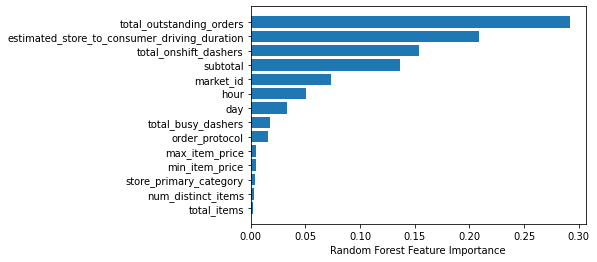

In [ ]:
sorted_idx = regressor.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
import tensorflow as tf 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2,  random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(14,  kernel_initializer='normal', activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))

from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=50, batch_size=512, verbose=1, validation_split=0.2)

Epoch 1/50
219/219 [==============================] - 2s 6ms/step - loss: 60.3279 - mse: 60.3279 - mae: 4.3882 - val_loss: 2.6879 - val_mse: 2.6879 - val_mae: 1.2031
Epoch 2/50
219/219 [==============================] - 1s 5ms/step - loss: 2.2973 - mse: 2.2973 - mae: 1.1671 - val_loss: 2.4553 - val_mse: 2.4553 - val_mae: 1.3615
Epoch 3/50
219/219 [==============================] - 1s 5ms/step - loss: 1.5626 - mse: 1.5626 - mae: 0.9796 - val_loss: 0.3098 - val_mse: 0.3098 - val_mae: 0.4220
Epoch 4/50
219/219 [==============================] - 1s 5ms/step - loss: 1.5869 - mse: 1.5869 - mae: 1.0118 - val_loss: 1.7579 - val_mse: 1.7579 - val_mae: 1.1678
Epoch 5/50
219/219 [==============================] - 1s 5ms/step - loss: 1.0577 - mse: 1.0577 - mae: 0.8376 - val_loss: 3.4798 - val_mse: 3.4798 - val_mae: 1.7932
Epoch 6/50
219/219 [==============================] - 1s 5ms/step - loss: 1.5529 - mse: 1.5529 - mae: 0.9397 - val_loss: 0.4469 - val_mse: 0.4469 - val_mae: 0.5664
Epoch 7/50
219

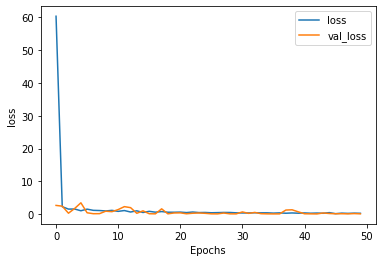

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'loss')

In [ ]:
z= model.predict(X_test)
mse = metrics.mean_squared_error(y_test, z)
rmse = mse**.5
print("errors for neural net")
print("mse : ",mse)
print("rmse : ",rmse)
mae = metrics.mean_absolute_error(y_test, z)
print("mae : ",mae)


1094/1094 [==============================] - 2s 2ms/step
errors for neural net
mse :  0.11972676657978198
rmse :  0.34601555829150515
mae :  0.283931059508911
